In [58]:
from scipy.spatial.distance import pdist, squareform


from scipy.linalg import eigh

import numpy as np 


# 实现 

In [76]:
def rbf_kernel_pca_z(X, gamma, n_components):

    """
    RBF kernel PCA implementation.    

    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]  

    gamma: float  
    gamma: float

        Tuning parameter of the RBF kernel    

    n_components: int

        Number of principal components to return    

    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_examples, k_features]

        Projected dataset   

    """
    #### 1  K = Kernel matrix 

    #dist_condensed = pdist(X , lambda u, v: np.exp(  -(((u-v)**2).sum()) / 2*gamma*gamma  ) )
    #dist_X  = squareform(dist_condensed) 
    #pairwise_dists = squareform(pdist(X, 'euclidean'))
    #K = np.exp(-pairwise_dists ** 2 / gamma  ** 2)
    pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
    K = np.exp(-pairwise_sq_dists / gamma **2)
    #print ( K.shape   )
    #print ( K   )
    #   zero mean  of the kernel matrix.

    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
    
    
    # compute eigen vector of K 
    
    eigvals, eigvecs = eigh(K)  
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    
    print ( eigvals.shape )
    
    # select top-k , get k*N matrx   W 
    X_pc = np.column_stack([eigvecs[:, i]
                           for i in range(n_components)])    

    print ( X_pc.shape )    
    
    return X_pc 
    
    
    

# 例子1 

(100, 2)


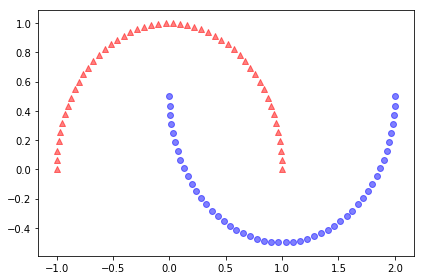

In [74]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 

%matplotlib inline 
X, y = make_moons(n_samples=100, random_state=123)
print (X.shape )
plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5)

plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)

plt.tight_layout()

plt.show()

(100,)
(100, 2)


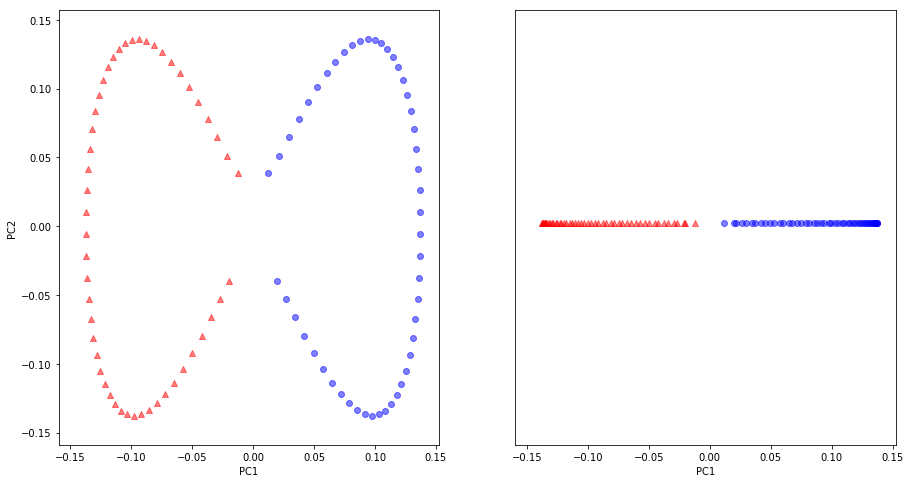

In [78]:
X_kpca_z = rbf_kernel_pca_z(X, gamma=15, n_components=2) 
  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8 ))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],              color='red', marker='^', alpha=0.5) 
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],            color='blue', marker='o', alpha=0.5) 


ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))+0.02,    color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1') 
ax[0].set_ylabel('PC2') 
ax[1].set_ylim([-1, 1]) 
ax[1].set_yticks([])
ax[1].set_xlabel('PC1') 
plt.show() 

# 例子2 

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets
 

(150, 4)
(150,)
(150, 3)


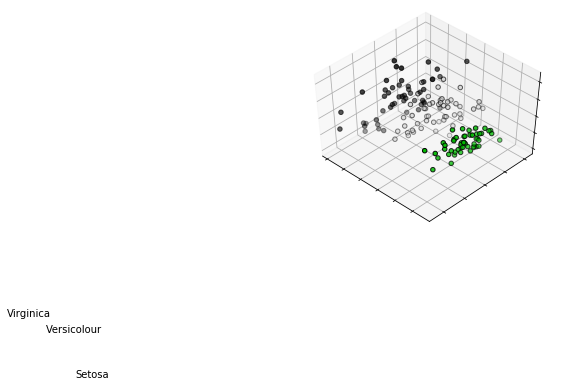

In [106]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
print (X.shape )
set(y)
fig = plt.figure(1, figsize=(4, 3  ))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
X=  rbf_kernel_pca_z (X, n_components=3 , gamma =15       ) 
X.shape 
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show() 

In [89]:
#pca = decomposition.PCA(n_components=3)
#pca = decomposition.PCA(n_components=3) 
#pca.fit(X)
#X = pca.transform(X)
X=  rbf_kernel_pca_z (X, n_components=3  , gamma =10 ) 
X.shape 

(150,)
(150, 3)


(150, 3)